## Importing All Installed Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import itertools



warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_6384\2954675209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load Dataset

In [2]:
df = pd.read_csv("salesweekly.csv")

In [4]:
df.head(11)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.300,185.950,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.900,190.700,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.900,218.400,80.0,8.0,29.0,12.0
3,1/26/2014,34.00,32.37,31.500,179.600,80.0,8.0,23.0,10.0
4,2/2/2014,31.02,23.35,20.700,159.880,84.0,12.0,29.0,12.0
5,2/9/2014,22.65,29.72,53.300,226.800,98.0,7.0,31.0,6.0
6,2/16/2014,33.33,30.69,47.300,320.700,89.0,14.0,18.0,16.2
7,2/23/2014,39.01,34.25,44.200,232.700,99.0,5.0,35.0,7.0
8,3/2/2014,36.68,28.75,40.355,222.500,52.0,2.0,16.0,10.1
9,3/9/2014,25.02,21.11,31.800,202.375,48.0,4.0,16.0,9.2


## Drawing Insights From Dataset

In [5]:
df.shape

(302, 9)

In [6]:
df.isna().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [7]:
df[df.duplicated()]

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   302 non-null    object 
 1   M01AB   302 non-null    float64
 2   M01AE   302 non-null    float64
 3   N02BA   302 non-null    float64
 4   N02BE   302 non-null    float64
 5   N05B    302 non-null    float64
 6   N05C    302 non-null    float64
 7   R03     302 non-null    float64
 8   R06     302 non-null    float64
dtypes: float64(8), object(1)
memory usage: 21.4+ KB


In [9]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,35.102441,27.167611,27.060295,208.627161,61.740853,4.138935,38.439811,20.224561
std,8.617106,7.043491,8.086458,76.069221,22.436970,3.129265,22.900873,11.381464
min,7.670000,6.237000,3.500000,86.250000,18.000000,0.000000,2.000000,1.000000
25%,29.387500,22.387500,21.300000,149.300000,47.000000,2.000000,21.000000,11.475000
50%,34.565000,26.789500,26.500000,198.300000,57.000000,3.979167,35.000000,17.500000
75%,40.175000,31.046500,32.475000,252.471500,71.000000,6.000000,51.000000,26.000000
max,65.330000,53.571000,60.125000,546.899000,154.000000,17.000000,131.000000,65.000000


## Changing datum to datetime

In [10]:
#converting datatype of dates from object to Datetime
df['datum'] = pd.to_datetime(df['datum'], infer_datetime_format=True)


In [11]:
corr = df[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].corr()

In [12]:
corr

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
M01AB,1.000000,0.251574,0.165271,0.212462,-0.062916,0.001628,0.145984,0.098144
M01AE,0.251574,1.000000,0.241872,0.424185,0.094238,0.032409,0.221023,-0.089384
N02BA,0.165271,0.241872,1.000000,0.324098,0.300877,0.092970,-0.021493,-0.184593
N02BE,0.212462,0.424185,0.324098,1.000000,0.127111,0.082989,0.446968,-0.417905
N05B,-0.062916,0.094238,0.300877,0.127111,1.000000,0.279640,0.034152,-0.205082
N05C,0.001628,0.032409,0.092970,0.082989,0.279640,1.000000,0.138947,-0.095079
R03,0.145984,0.221023,-0.021493,0.446968,0.034152,0.138947,1.000000,-0.090285
R06,0.098144,-0.089384,-0.184593,-0.417905,-0.205082,-0.095079,-0.090285,1.000000


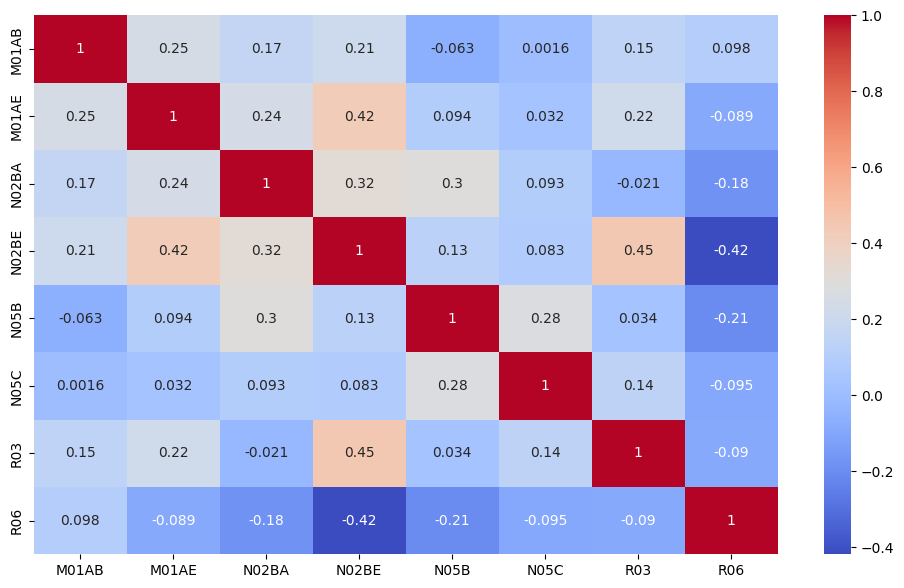

In [13]:
plt.figure(figsize=(12, 7))
sns.heatmap(annot=True, cmap="coolwarm", data=corr)
plt.show()

## Determining Categorical and Numarical Variables

In [14]:
separated_values = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

In [15]:
colrs = ["green", "blue", "red"]

def plot_seasonality(data, colums):
    for idx, col in enumerate(colums):
        plt.figure(figsize=(12, 5))
        plt.title(f"Date Against {col}")
        plt.xlabel("Date")
        plt.ylabel(f"{col}")
        sns.lineplot(data=data, x="datum", y=col, marker="o", color=colrs[idx % len(colrs)])
        plt.show()
    

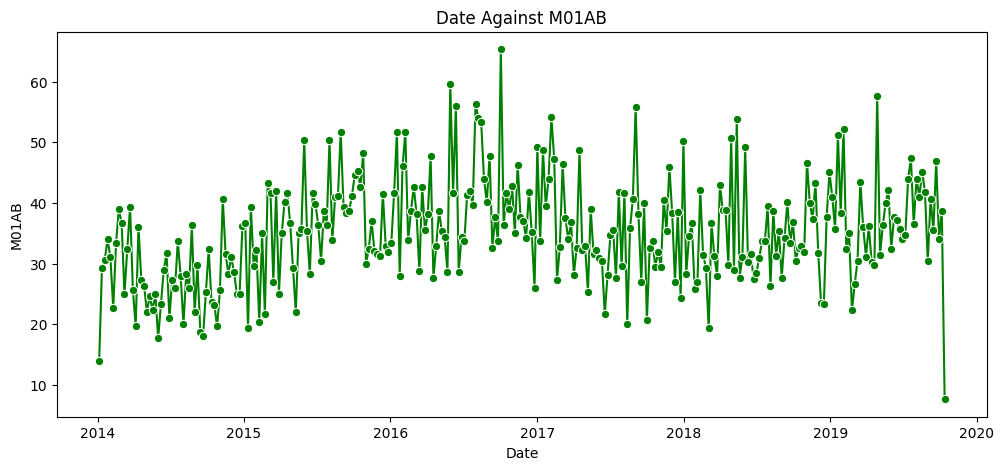

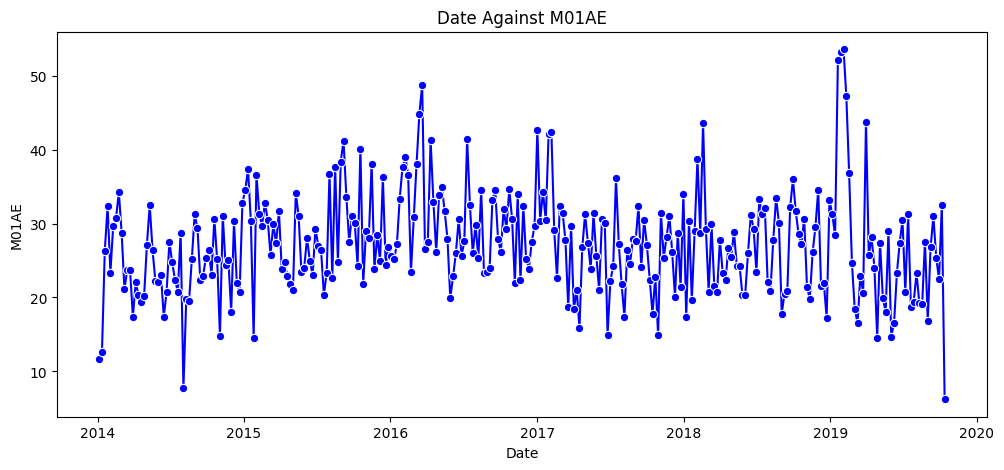

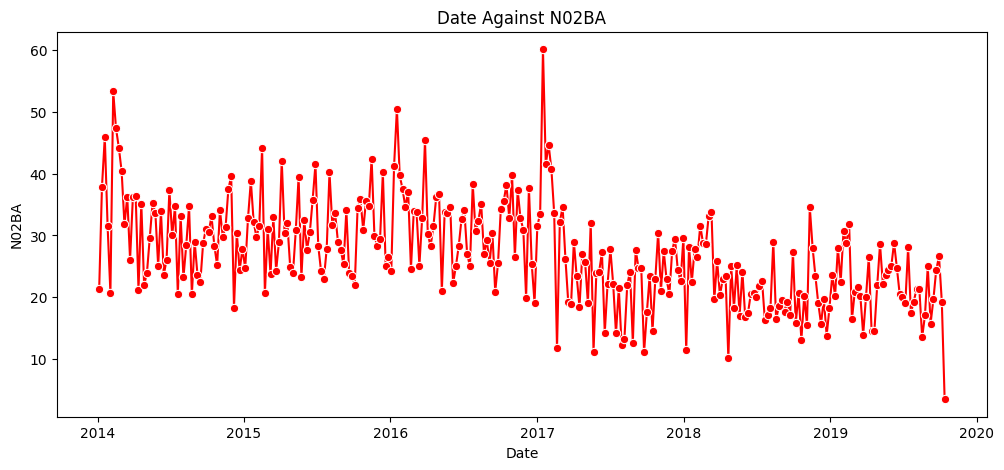

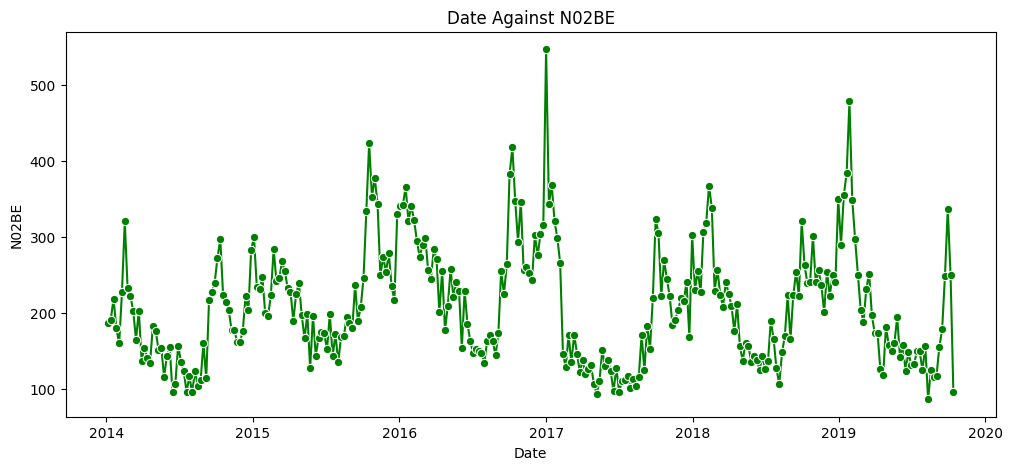

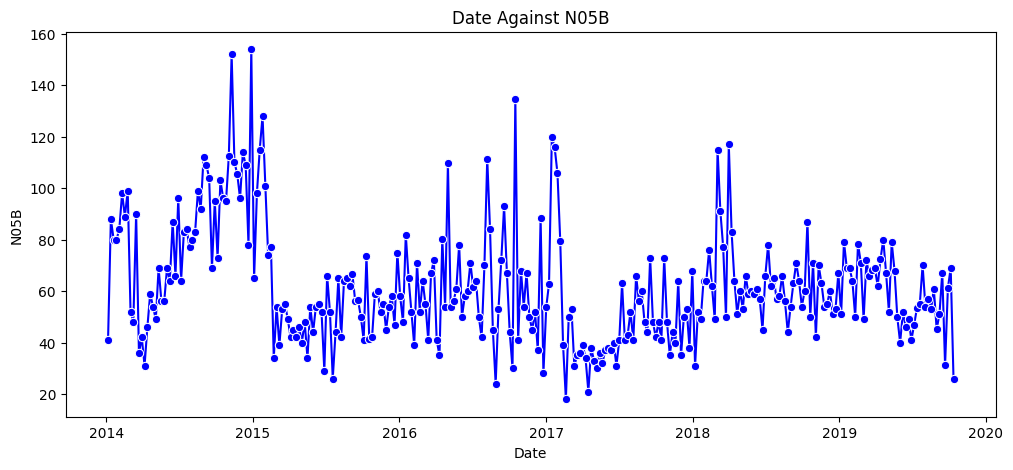

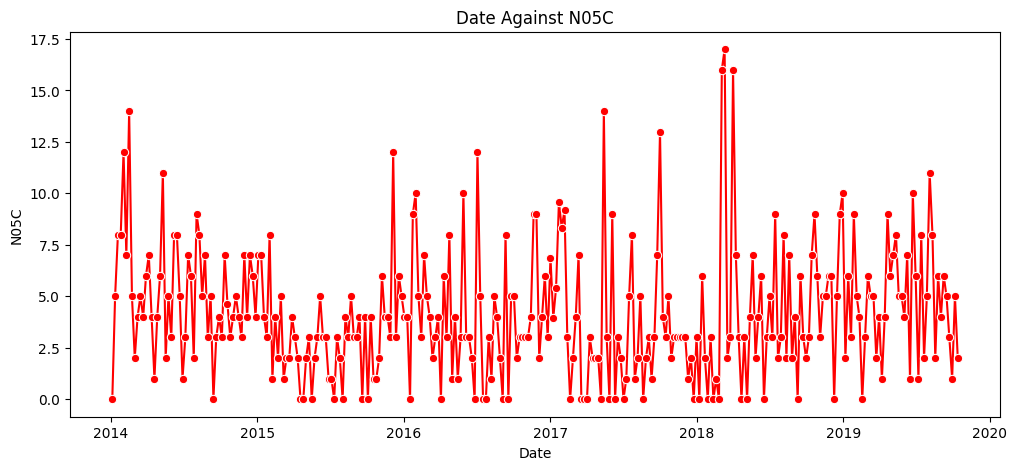

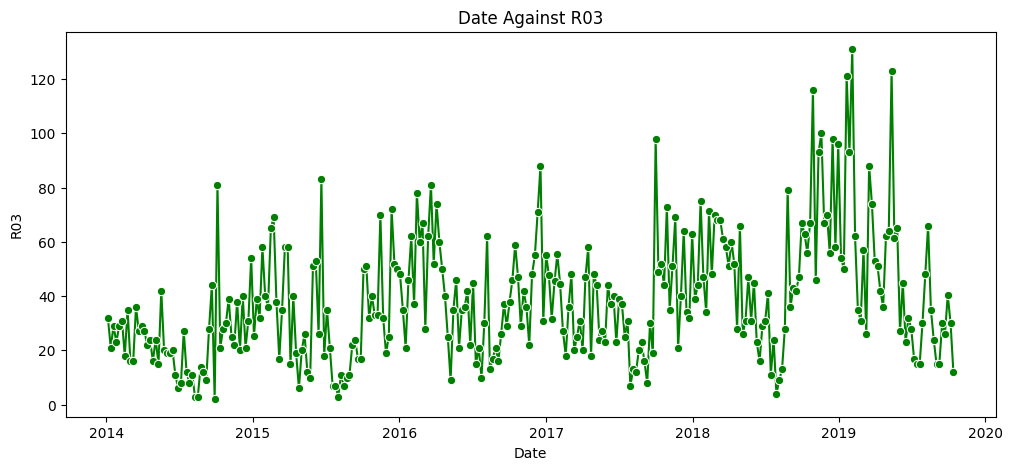

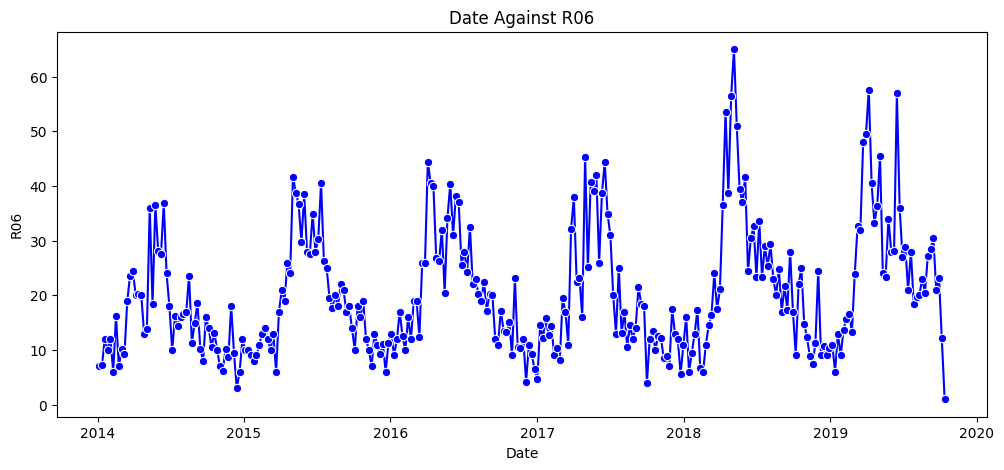

In [16]:
plot_seasonality(df, separated_values)

In [17]:
main_sales = df[separated_values].sum()

In [18]:
main_sales

M01AB    10600.937083
M01AE     8204.618646
N02BA     8172.209000
N02BE    63005.402708
N05B     18645.737500
N05C      1249.958333
R03      11608.822917
R06       6107.817500
dtype: float64

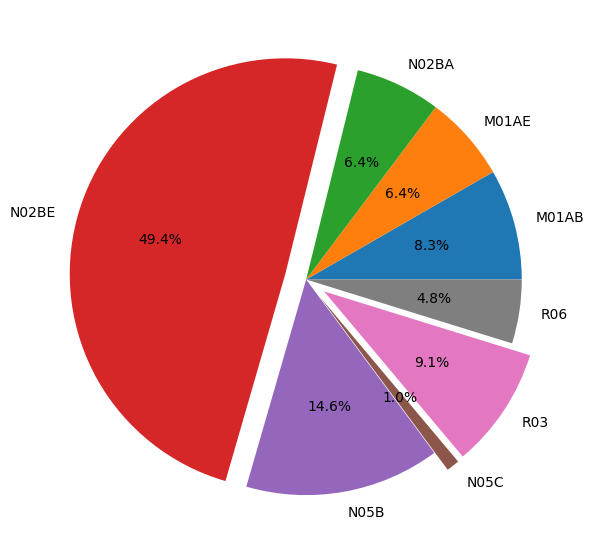

In [19]:
plt.figure(figsize=(15, 7))
plt.pie(main_sales, labels=separated_values, autopct="%2.1f%%", explode=(0, 0, 0, 0.1, 0, 0.1, 0.1, 0))
plt.show()

## Additional Columns

In [20]:

#extracting year from dates
df['year'] = df['datum'].dt.year
df['month'] = df['datum'].dt.month
df['day'] = df['datum'].dt.day

In [21]:
grouped_categories = df.groupby('year')[separated_values].sum()

## Statistical APproach To Determine Whether the Dataset is Stationary or Not

## Augmented Dickey-Fuller (ADF)

In [22]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
# setting date as index of dataframe, basic condition for anlysing time series data
df.set_index(df['datum'], inplace= True)


===== M01AB =====
ADF Statistic: -3.6287
p-value: 0.0052
Critical Value (1%): -3.4527
Critical Value (5%): -2.8714
Critical Value (10%): -2.5720
✅ M01AB is likely **stationary** (reject H0)


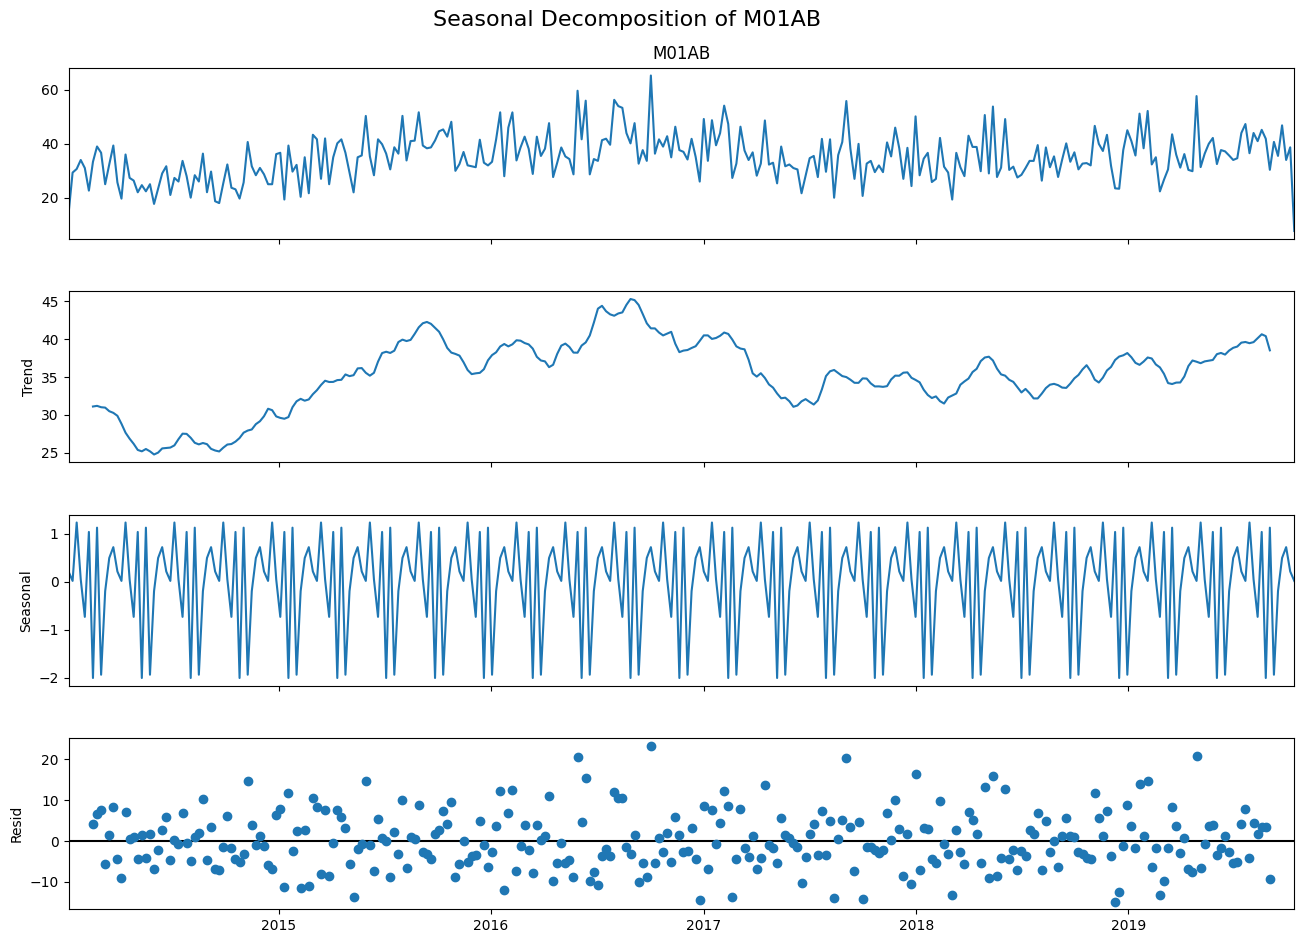

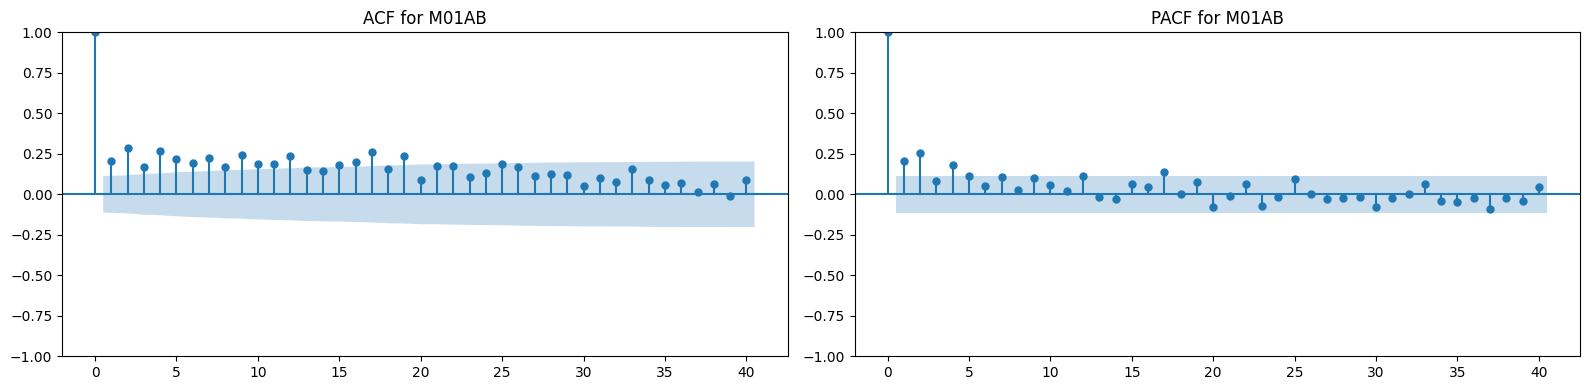


===== M01AE =====
ADF Statistic: -8.7394
p-value: 0.0000
Critical Value (1%): -3.4523
Critical Value (5%): -2.8712
Critical Value (10%): -2.5719
✅ M01AE is likely **stationary** (reject H0)


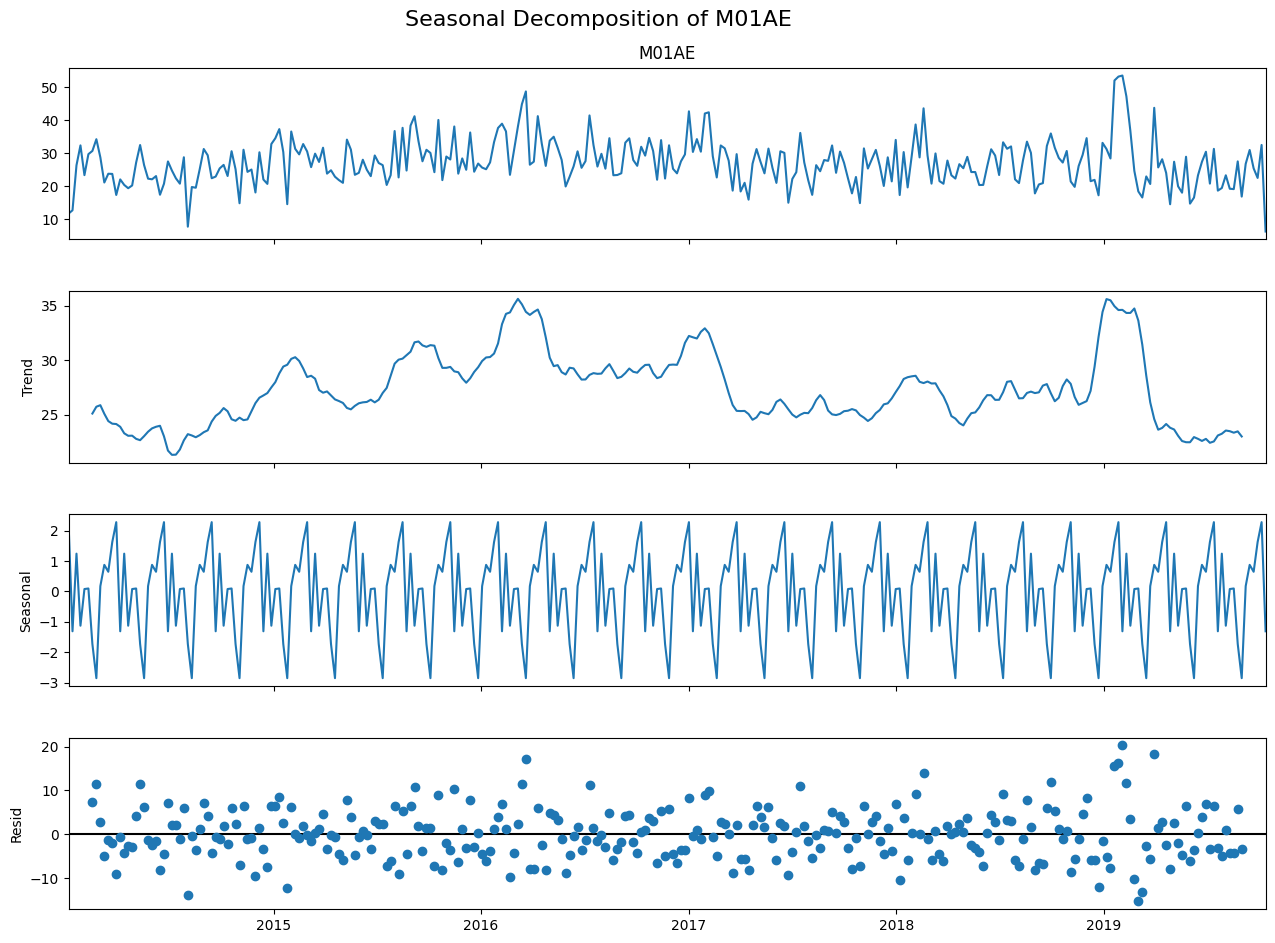

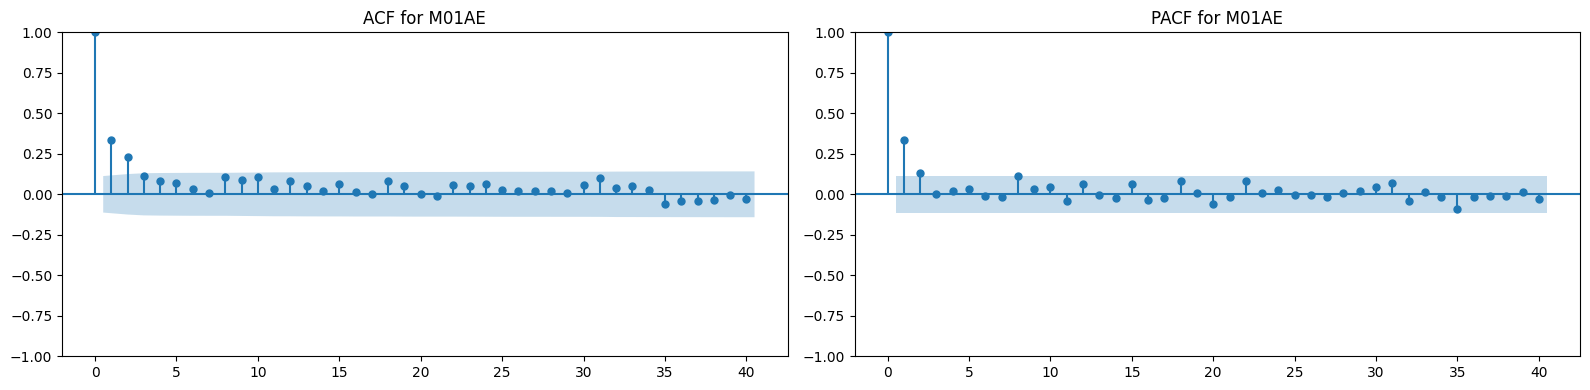


===== N02BA =====
ADF Statistic: -1.7214
p-value: 0.4201
Critical Value (1%): -3.4532
Critical Value (5%): -2.8716
Critical Value (10%): -2.5721
⚠️ N02BA is likely **non-stationary** (fail to reject H0)


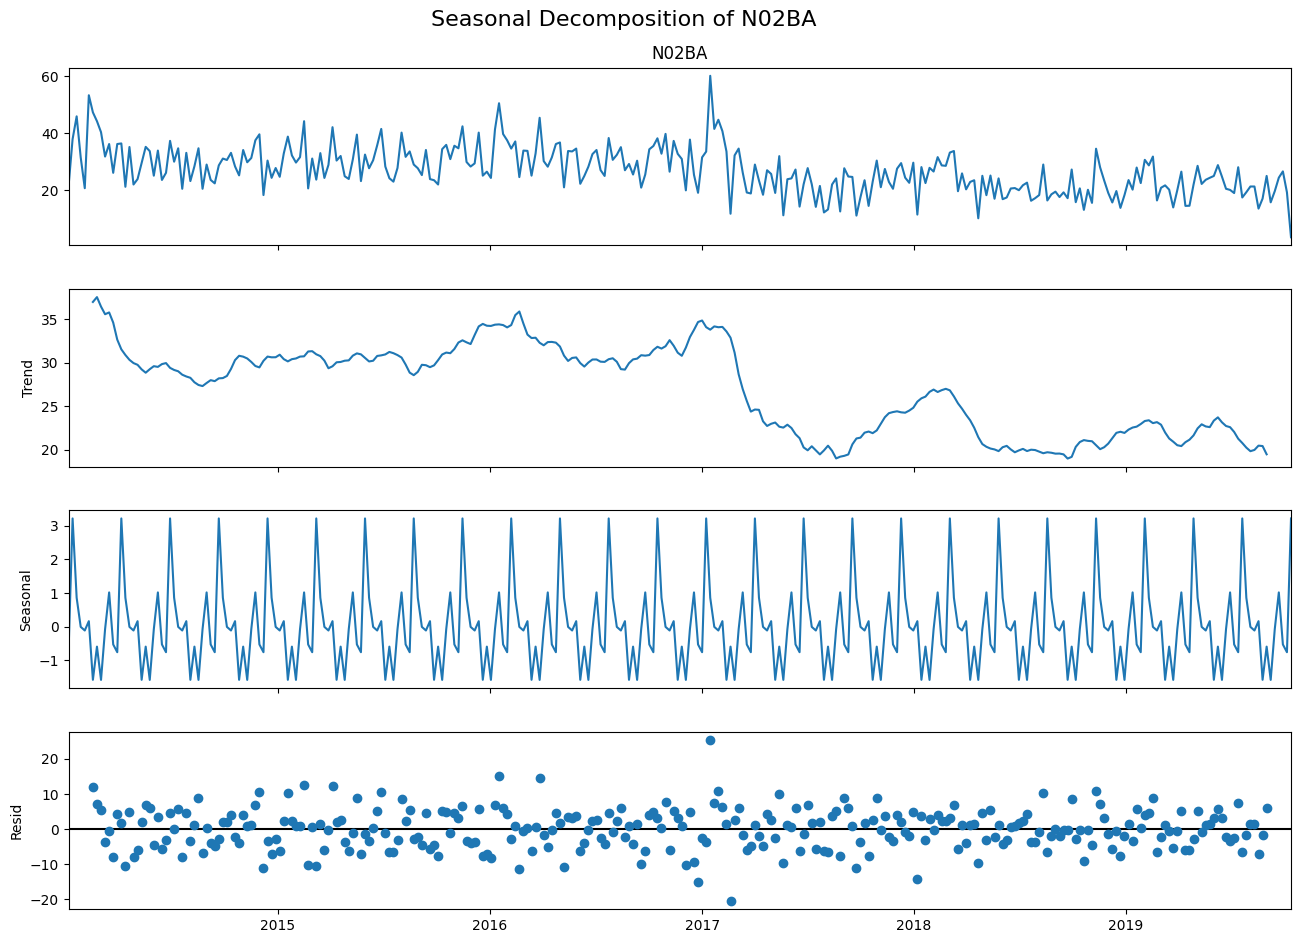

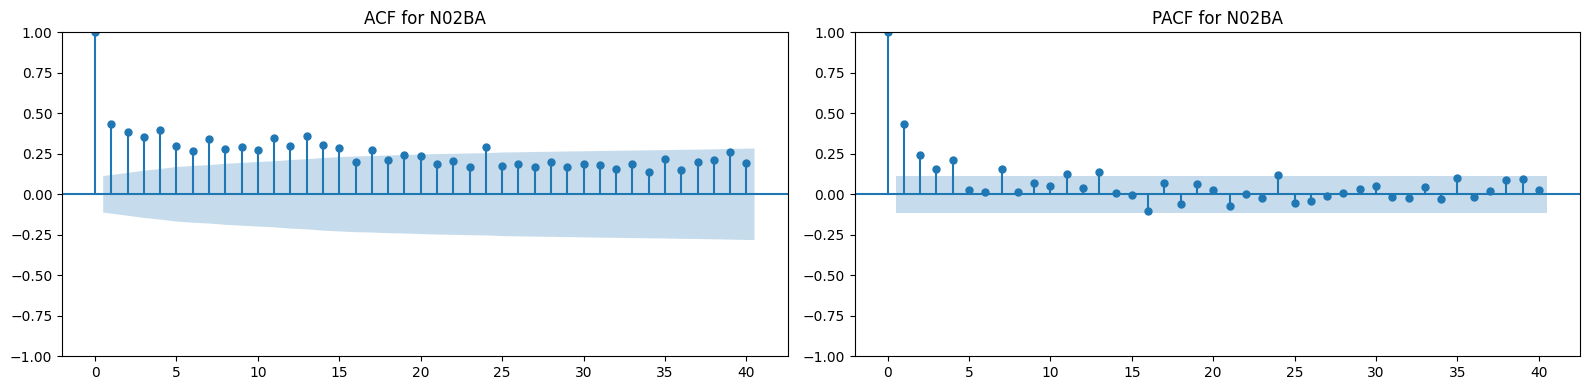


===== N02BE =====
ADF Statistic: -4.3706
p-value: 0.0003
Critical Value (1%): -3.4523
Critical Value (5%): -2.8712
Critical Value (10%): -2.5719
✅ N02BE is likely **stationary** (reject H0)


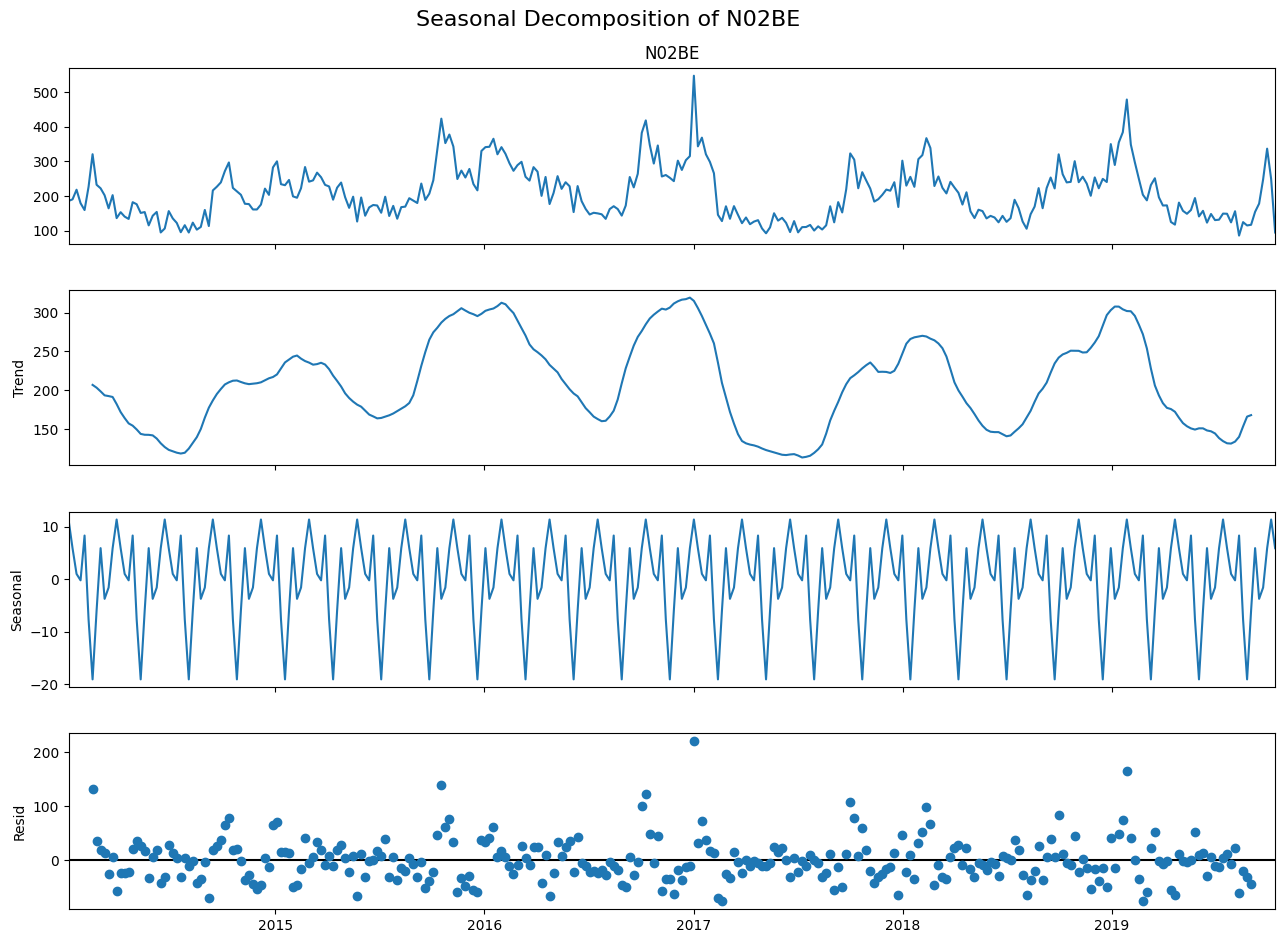

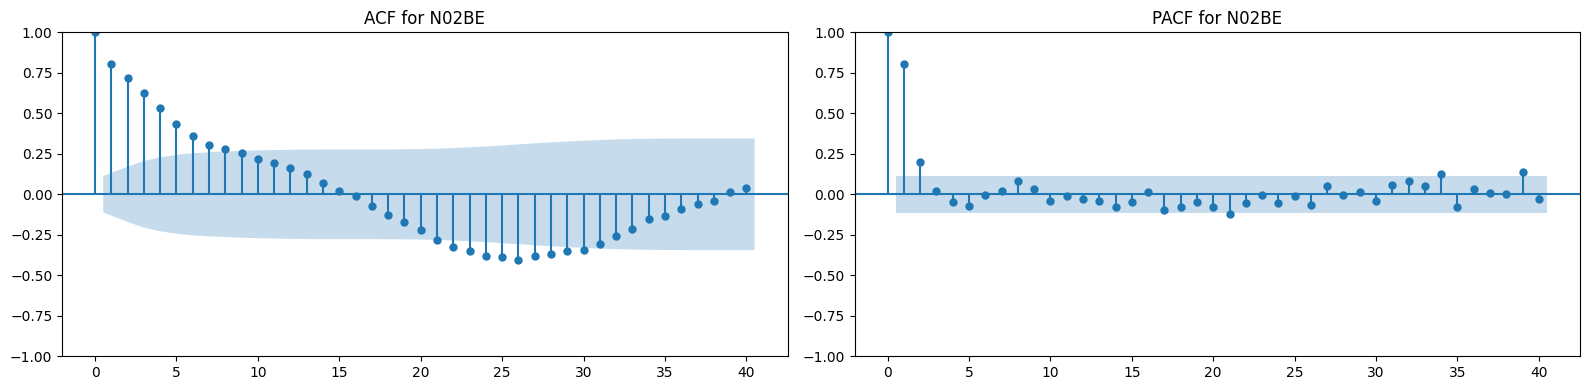


===== N05B =====
ADF Statistic: -3.5988
p-value: 0.0058
Critical Value (1%): -3.4526
Critical Value (5%): -2.8713
Critical Value (10%): -2.5720
✅ N05B is likely **stationary** (reject H0)


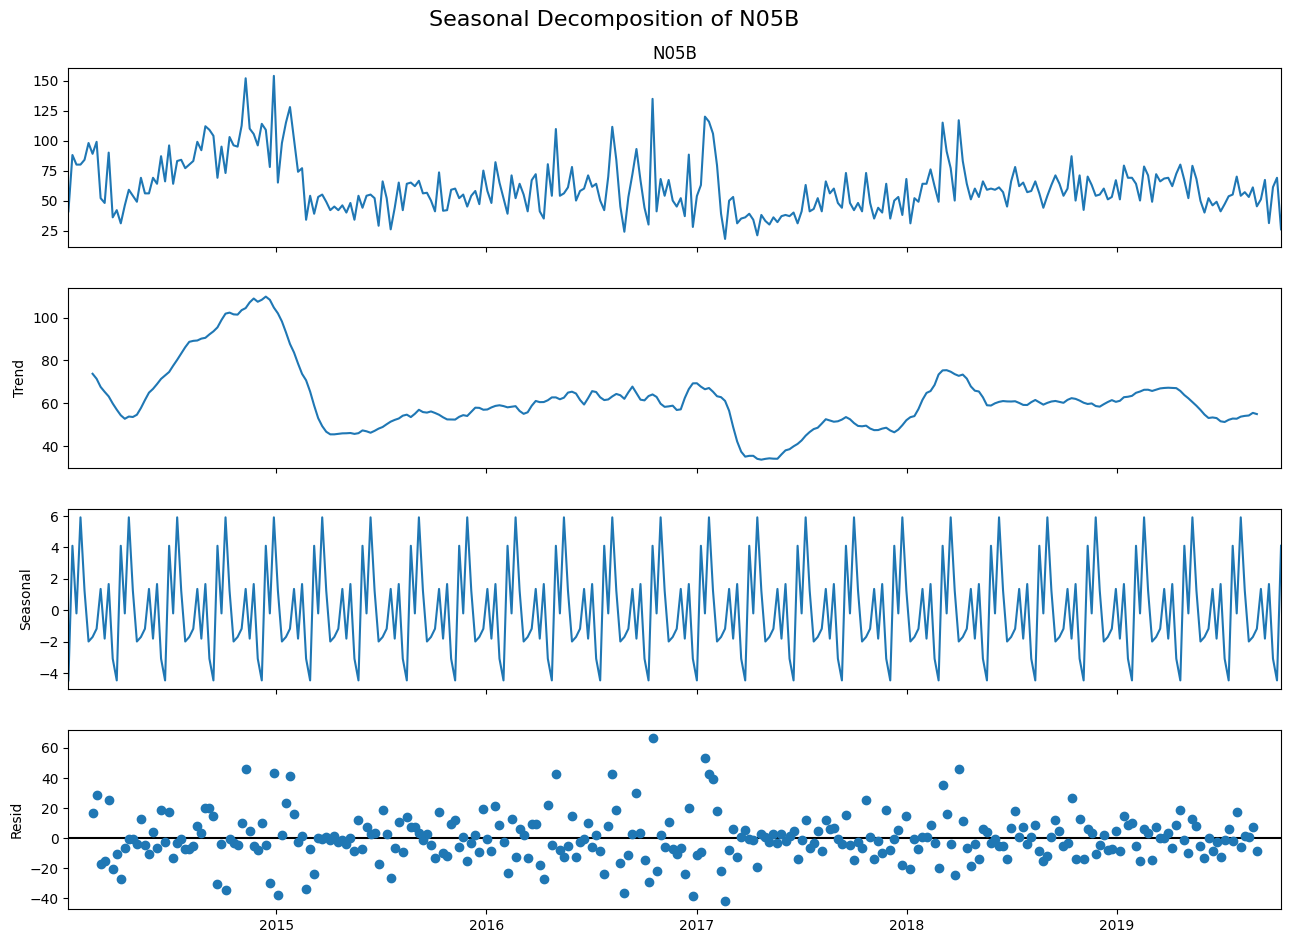

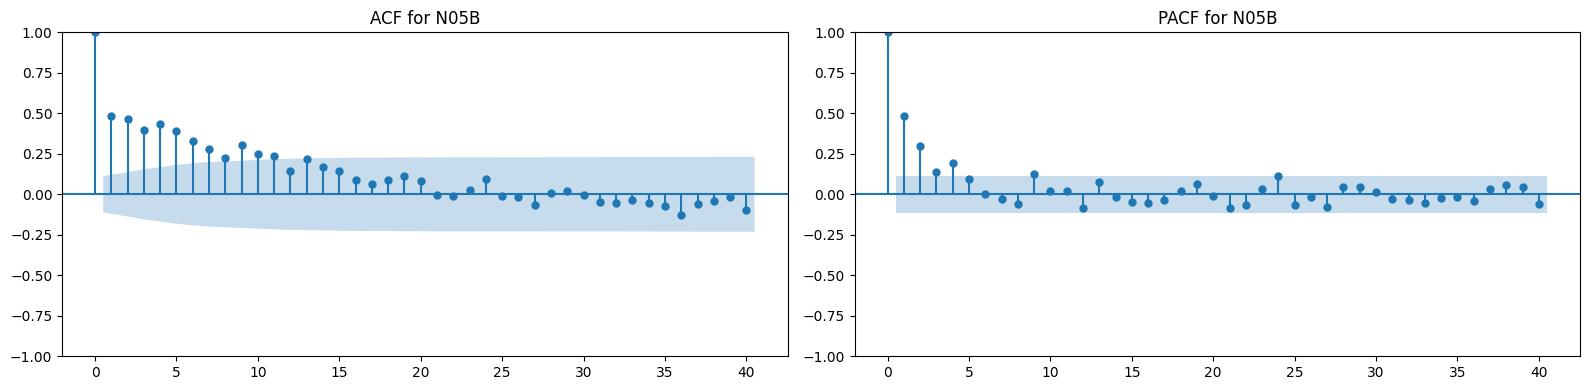


===== N05C =====
ADF Statistic: -15.0005
p-value: 0.0000
Critical Value (1%): -3.4523
Critical Value (5%): -2.8712
Critical Value (10%): -2.5719
✅ N05C is likely **stationary** (reject H0)


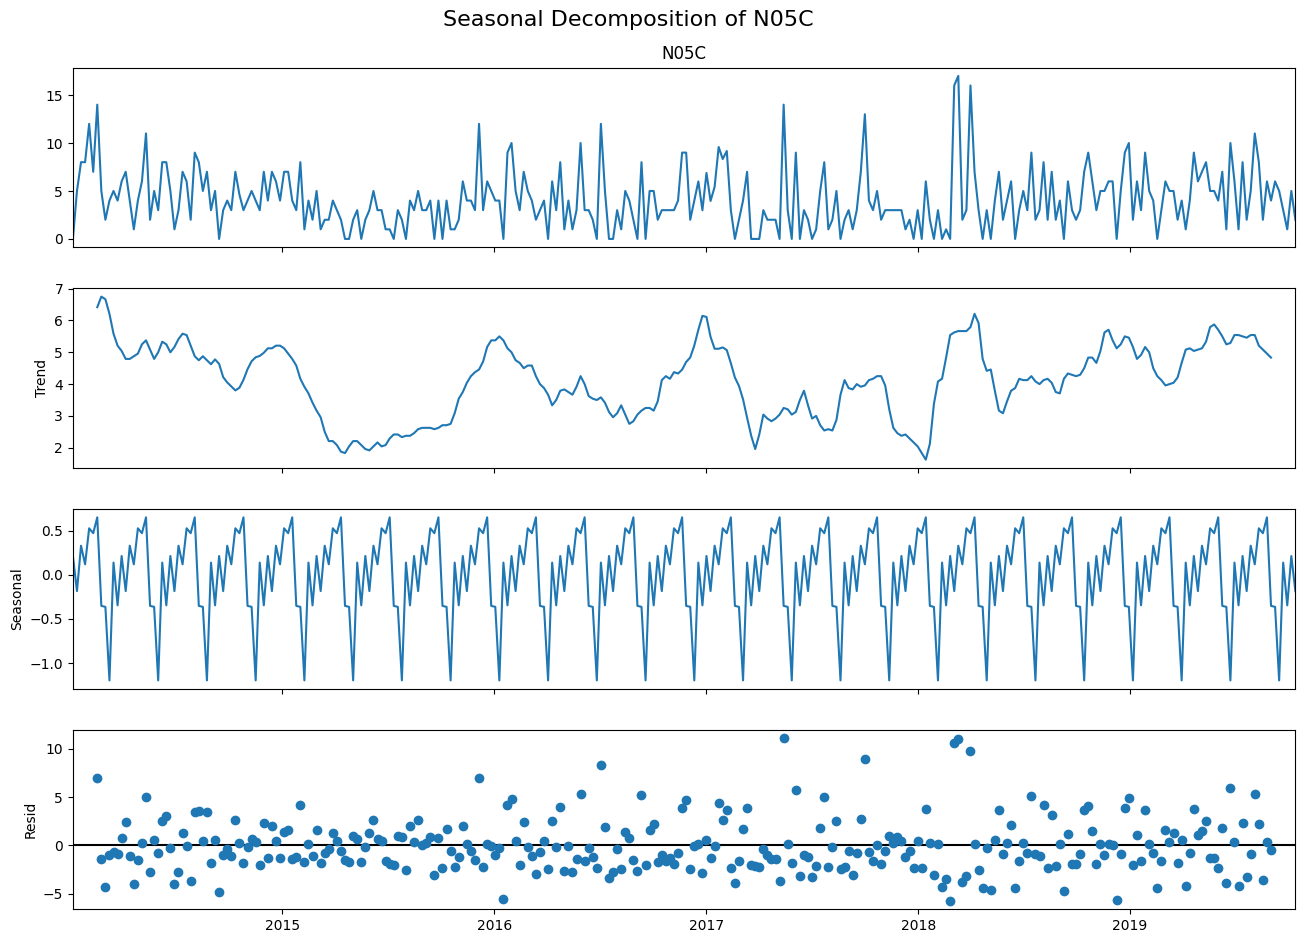

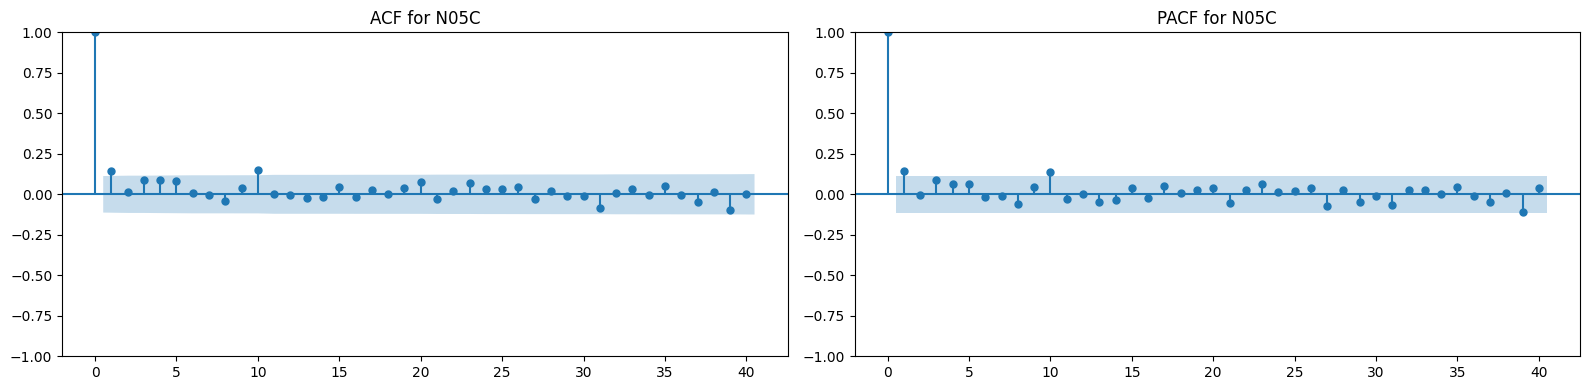


===== R03 =====
ADF Statistic: -3.4176
p-value: 0.0104
Critical Value (1%): -3.4528
Critical Value (5%): -2.8714
Critical Value (10%): -2.5720
✅ R03 is likely **stationary** (reject H0)


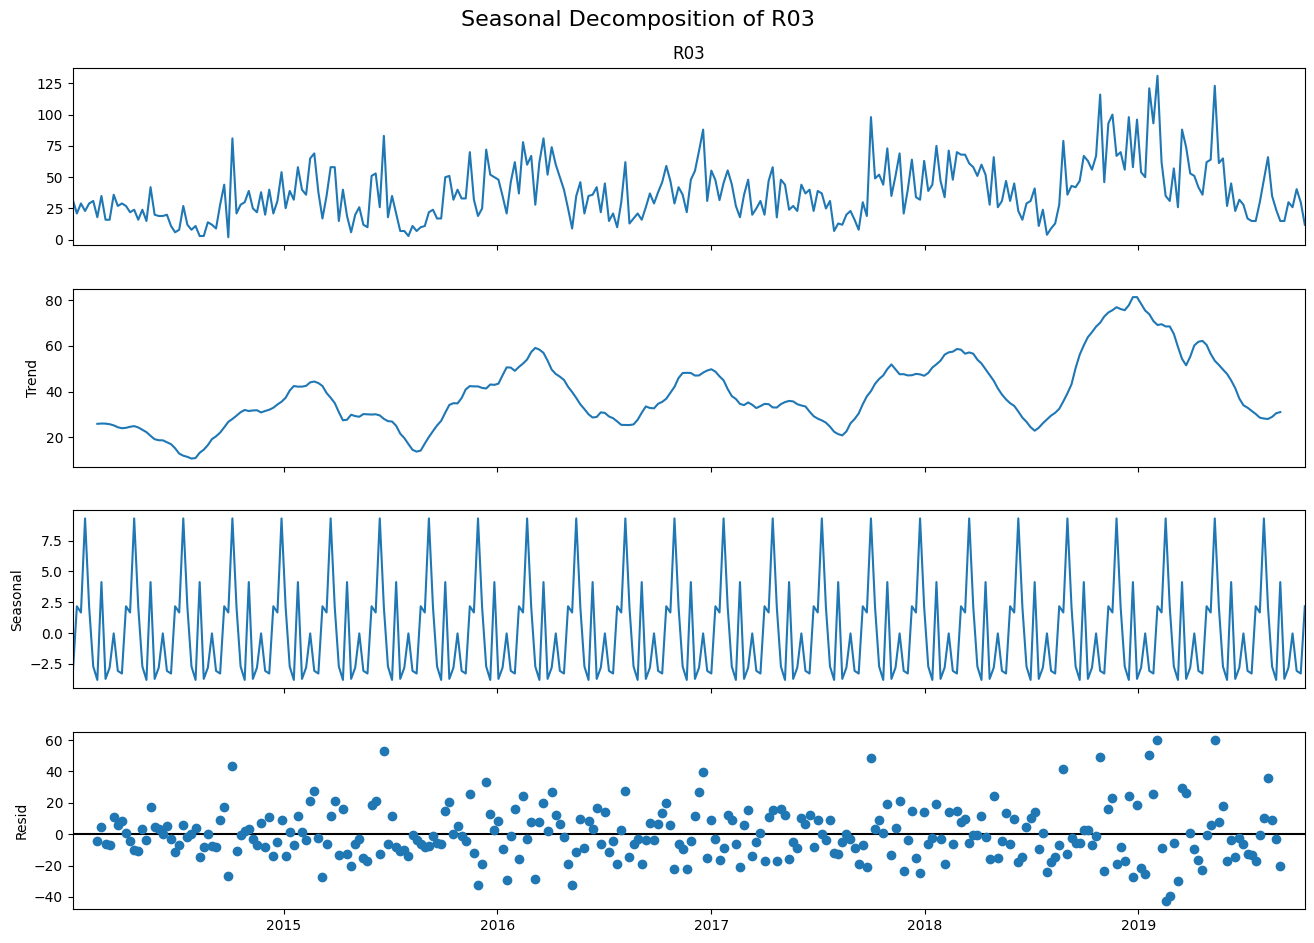

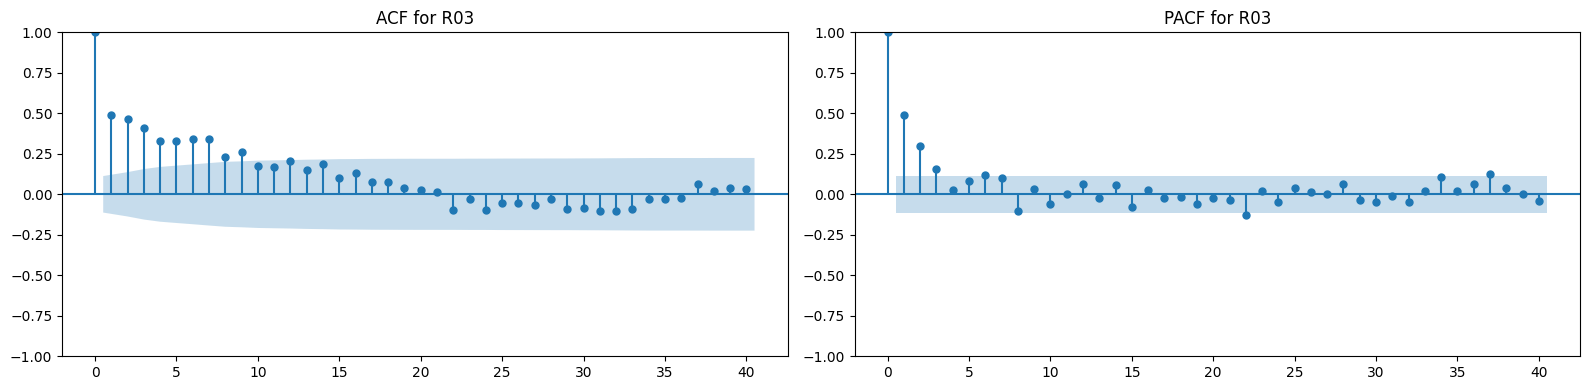


===== R06 =====
ADF Statistic: -5.0281
p-value: 0.0000
Critical Value (1%): -3.4533
Critical Value (5%): -2.8717
Critical Value (10%): -2.5722
✅ R06 is likely **stationary** (reject H0)


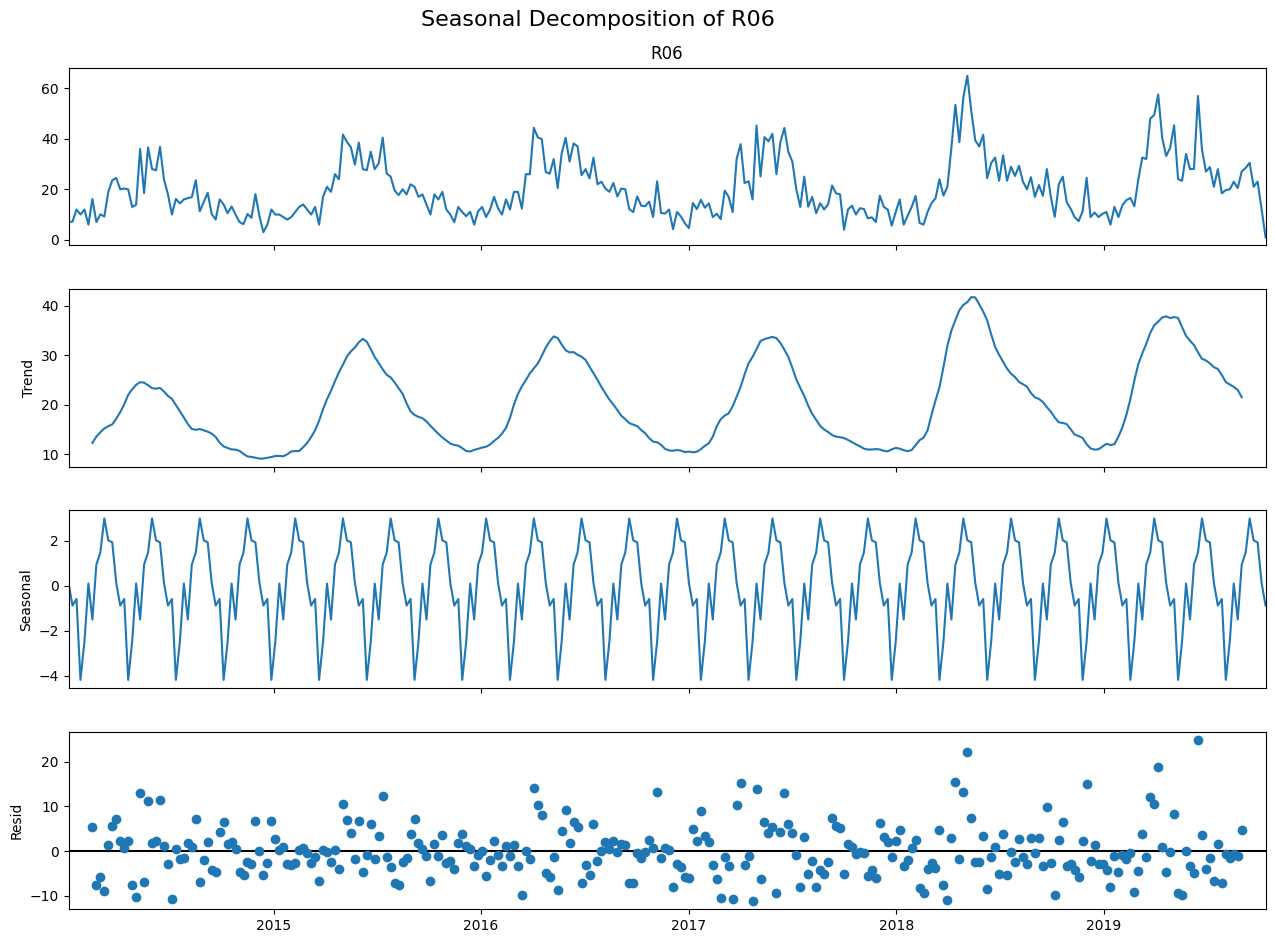

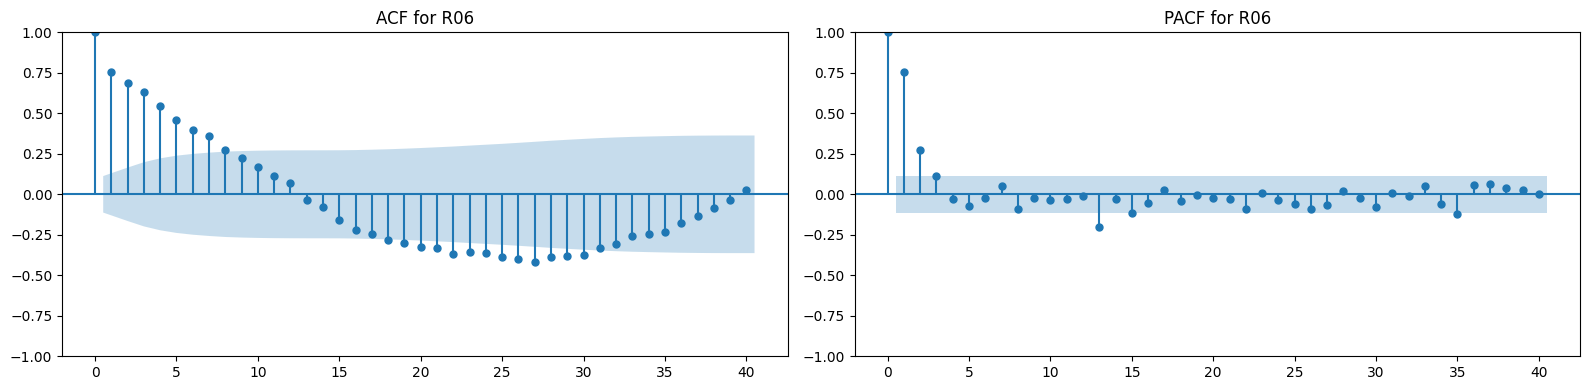

In [24]:
# --- Loop through each series ---
for column in separated_values:
    series = df[column]
    
    print(f"\n===== {column} =====")
    
    # --- ADF Test ---
    result = adfuller(series)
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    print(f"ADF Statistic: {adf_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    for key, value in critical_values.items():
        print(f"Critical Value ({key}): {value:.4f}")

    # Interpret result
    if p_value < 0.05:
        print(f"✅ {column} is likely **stationary** (reject H0)")
    else:
        print(f"⚠️ {column} is likely **non-stationary** (fail to reject H0)")

    # --- Seasonal Decomposition ---
    try:
        decomposition = seasonal_decompose(series, model='additive', period=12)
        fig = decomposition.plot()
        fig.set_size_inches(14, 10)
        plt.suptitle(f"Seasonal Decomposition of {column}", fontsize=16)
        plt.show()
    except Exception as e:
        print(f"Decomposition failed for {column}: {e}")
    
    # --- ACF and PACF ---
    max_lag = max(1, min(40, len(series) // 2 - 1))
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(series, ax=axes[0], lags=max_lag)
    plot_pacf(series, ax=axes[1], lags=max_lag, method='ywm')
    axes[0].set_title(f"ACF for {column}")
    axes[1].set_title(f"PACF for {column}")
    plt.tight_layout()
    plt.show()

## AGGREGATE SALES

In [25]:
#calculating total sales
df['total_sales'] = df['M01AB']
for cols in df.columns[2:9]:
    df['total_sales'] = df['total_sales']+df[cols]

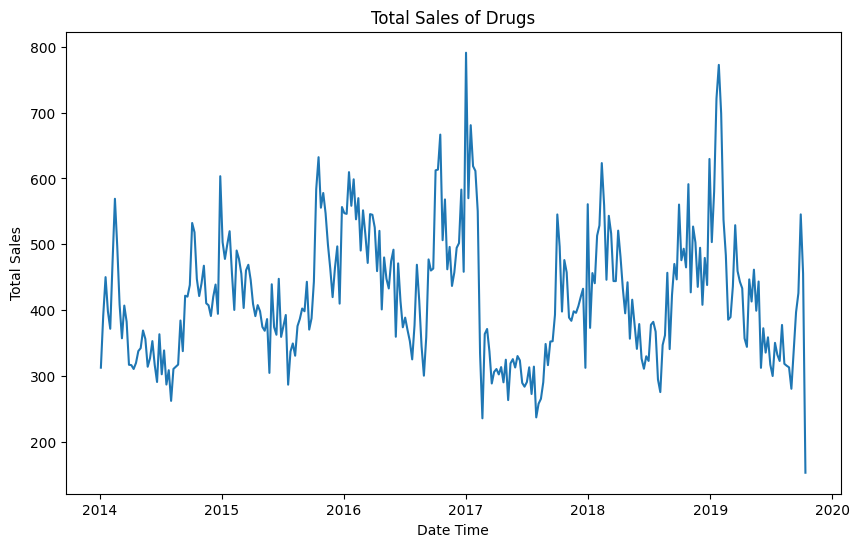

In [26]:
# plotting the total sales data 
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['total_sales'])
plt.xlabel('Date Time')
plt.ylabel('Total Sales')
plt.title('Total Sales of Drugs')
plt.show()

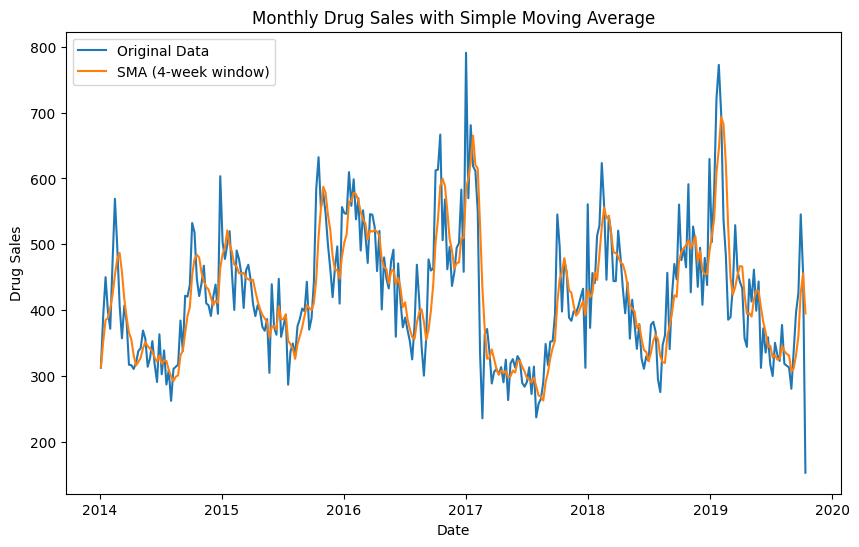

In [27]:
# Calculate a simple moving average with window size 4 (adjust as needed)
window_size = 4
df['SMA'] = df['total_sales'].rolling(window=window_size, min_periods=1).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['total_sales'], label='Original Data')
plt.plot(df.index, df['SMA'], label=f'SMA ({window_size}-week window)')
plt.title('Monthly Drug Sales with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Drug Sales')
plt.legend()
plt.show()

In [28]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [29]:
perform_adf_test(df["SMA"])

ADF Statistic: -3.502640
p-value: 0.007920


In [30]:
#infer the frequency of the data
monthly = df.asfreq(pd.infer_freq(df.index))

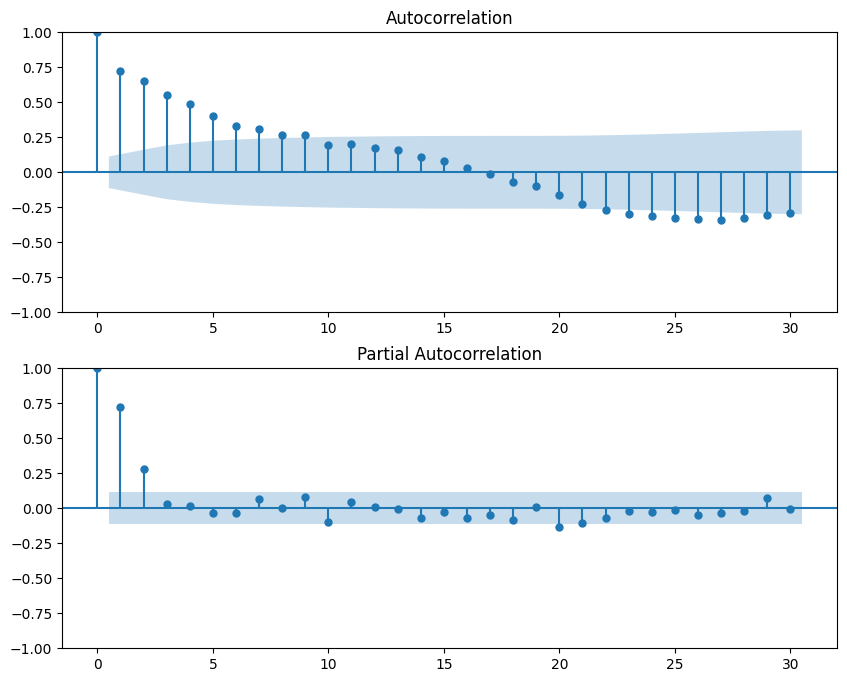

In [31]:
# Plot ACF and PACF of the differenced series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(monthly['total_sales'], lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(monthly['total_sales'], lags=30, ax=ax2)
plt.show()

## Model Training Section

## ALL METRICS

In [32]:
def evaluate_forecast(y_true, y_pred, verbose=True):
    """
    Evaluates forecasting performance using MAPE and accuracy.

    Parameters:
    - y_true: list or array of actual values
    - y_pred: list or array of predicted values
    - verbose: if True, prints the MAPE and accuracy

    Returns:
    - mape: Mean Absolute Percentage Error
    - accuracy: Approximate forecasting accuracy (100 - MAPE)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Avoid division by zero
    non_zero_indices = y_true != 0
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape

    if verbose:
        print(f"MAPE: {mape:.2f}%")
        print(f"Forecasting Accuracy: {accuracy:.2f}%")

    return mape, accuracy


In [33]:
evaluation_results = []

In [34]:
def create_supervised(series, n_lags=12):
    df = pd.DataFrame(series)
    df.columns = ['y']
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['y'].shift(i)
    df.dropna(inplace=True)
    return df

In [35]:

def forecast_xgboost(series, test_size=12, lags=12):
    df = create_supervised(series, lags)
    X = df.drop(df.columns[0], axis=1)
    y = df[df.columns[0]]

    X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
    y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]

    model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    mpe = evaluate_forecast(y_test, preds)
    
    evaluation_results.append({
        "Model": "XGBoost",
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MPE": mpe,
    })

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series, label='All Data')
    plt.plot(y_test.index, y_test, label='Actual Test', marker='o')
    plt.plot(y_test.index, preds, label='Forecast', linestyle='--', marker='x')
    plt.title('XGBoost Forecast')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return preds, y_test

In [36]:


def forecast_linear_regression(series, test_size=12, max_lags=24):
    def evaluate_model(test, forecast, model_name):
        mse = mean_squared_error(test, forecast)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test, forecast)
        mpe = evaluate_forecast(test, forecast)
        
        evaluation_results.append({
        "Model": "Linear Regression",
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MPE": mpe,
    })

    def plot_forecast(series, test_index, test, forecast, title):
        plt.figure(figsize=(10, 6))
        plt.plot(series, label='All Data')
        plt.plot(test_index, test, label='Actual Test')
        plt.plot(test_index, forecast, label='Forecast', linestyle='--')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Lag tuning
    best_lag = 1
    lowest_rmse = float('inf')

    for lag in range(1, max_lags + 1):
        data = create_supervised(series, n_lags=lag)
        X, y = data.drop('y', axis=1), data['y']
        X_train, X_test = X[:-test_size], X[-test_size:]
        y_train, y_test = y[:-test_size], y[-test_size:]

        model = LinearRegression()
        model.fit(X_train, y_train)
        forecast = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, forecast))

        if rmse < lowest_rmse:
            lowest_rmse = rmse
            best_lag = lag

    # Retrain with best lag
    data = create_supervised(series, n_lags=best_lag)
    X, y = data.drop('y', axis=1), data['y']
    X_train, X_test = X[:-test_size], X[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]

    model = LinearRegression()
    model.fit(X_train, y_train)
    forecast = model.predict(X_test)

    evaluate_model(y_test, forecast, f"Linear Regression (lag={best_lag})")
    plot_forecast(series, y_test.index, y_test, forecast, f"Linear Regression (lag={best_lag})")


In [37]:
from sklearn.ensemble import RandomForestRegressor

def forecast_random_forest(series, test_size=12, n_lags=12):
    def evaluate_model(test, forecast, model_name):
        mse = mean_squared_error(test, forecast)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test, forecast)
        mpe = evaluate_forecast(test, forecast)

        evaluation_results.append({
        "Model": "Random Forest",
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MPE": mpe,
    })

    def plot_forecast(series, test_index, test, forecast, title):
        plt.figure(figsize=(10, 6))
        plt.plot(series, label='All Data')
        plt.plot(test_index, test, label='Actual Test')
        plt.plot(test_index, forecast, label='Forecast', linestyle='--')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()

    data = create_supervised(series, n_lags=n_lags)
    X, y = data.drop('y', axis=1), data['y']
    X_train, X_test = X[:-test_size], X[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]

    best_model = None
    lowest_rmse = float('inf')
    best_params = None

    for n_estimators in [50, 100, 150]:
        for max_depth in [3, 5, 7, None]:
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
            model.fit(X_train, y_train)
            forecast = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, forecast))

            if rmse < lowest_rmse:
                lowest_rmse = rmse
                best_model = model
                best_params = (n_estimators, max_depth)

    final_forecast = best_model.predict(X_test)
    evaluate_model(y_test, final_forecast, f"Random Forest (n_estimators={best_params[0]}, max_depth={best_params[1]})")
    plot_forecast(series, y_test.index, y_test, final_forecast, f"Random Forest (n_estimators={best_params[0]}, max_depth={best_params[1]})")


In [38]:
from statsmodels.tsa.arima.model import ARIMA

def forecast_arima(series, test_size=12):
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))

    # Split the data into train and test sets
    train, test = series[:-test_size], series[-test_size:]

    lowest_aic = np.inf
    best_model = None
    best_order = None

    # Try all combinations of (p, d, q) to find the best ARIMA model based on AIC
    for order in pdq:
        try:
            model = ARIMA(train, order=order).fit()
            if model.aic < lowest_aic:
                lowest_aic = model.aic
                best_model = model
                best_order = order
        except:
            continue

    # Forecast using the best model
    forecast = best_model.forecast(steps=test_size)

    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test, forecast)

    evaluation_results.append({
        "Model": "ARIMA",
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
    })

    plt.figure(figsize=(10, 6))
    plt.plot(series, label='All Data', color='blue') 
    plt.plot(test.index, test, label='Actual Test', color='green') 
    plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
    plt.title(f"ARIMA{best_order} Forecast vs Actual")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return mse, rmse, mae


In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast_sarima(series, test_size=12):
    p = d = q = range(0, 2)
    P = D = Q = range(0, 2)
    s = 12  # for monthly data

    # Split the data into train and test sets
    train, test = series[:-test_size], series[-test_size:]

    # Initialize variables to track the best model and lowest AIC
    lowest_aic = np.inf
    best_model = None
    best_order = None

    for order in itertools.product(p, d, q):
        for seasonal_order in itertools.product(P, D, Q):
            try:
                model = SARIMAX(train, order=order, seasonal_order=seasonal_order + (s,)).fit()
                if model.aic < lowest_aic:
                    lowest_aic = model.aic
                    best_model = model
                    best_order = (order, seasonal_order + (s,))
            except:
                continue

    # Forecast using the best model
    forecast = best_model.forecast(steps=test_size)

    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test, forecast)

    evaluation_results.append({
        "Model": "SARIMAX",
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
    })

    plt.figure(figsize=(10, 6))
    plt.plot(series, label='All Data', color='blue')
    plt.plot(test.index, test, label='Actual Test', color='green') 
    plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--') 
    plt.title(f"SARIMA{best_order} Forecast vs Actual")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return mse, rmse, mae



In [40]:
from prophet import Prophet

def forecast_prophet(df, test_size=12):
    df = df.copy()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])

    train = df[:-test_size]
    test = df[-test_size:]

    # Initialize the Prophet model and fit it
    model = Prophet()
    model.fit(train)

    # Create future dates and make predictions
    future = model.make_future_dataframe(periods=test_size, freq='W')
    forecast = model.predict(future)
    forecast_values = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]

    mse = mean_squared_error(test['y'], forecast_values['yhat'])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test['y'], forecast_values['yhat'])
   
    evaluation_results.append({
        "Model": "FBPROPHET",
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
    })

    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], label='All Data', color='blue')
    plt.plot(test['ds'], test['y'], label='Actual Test', color='green') 
    plt.plot(test['ds'], forecast_values['yhat'], label='Forecast', color='red', linestyle='--') 
    plt.title("Prophet Forecast vs Actual")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return mse, rmse, mae


Importing plotly failed. Interactive plots will not work.


MAPE: 27.38%
Forecasting Accuracy: 72.62%


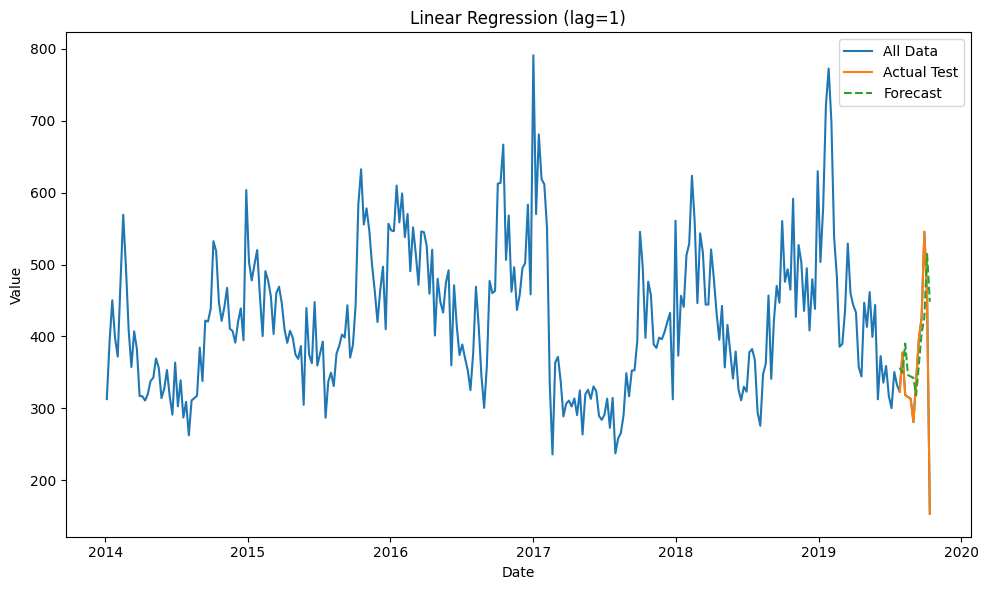

MAPE: 25.39%
Forecasting Accuracy: 74.61%


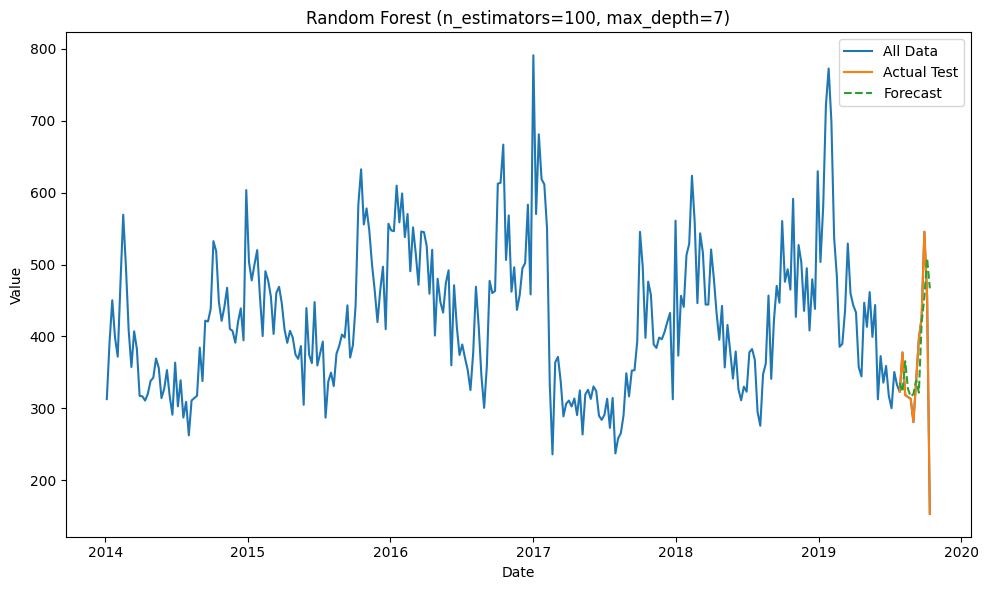

MAPE: 26.53%
Forecasting Accuracy: 73.47%


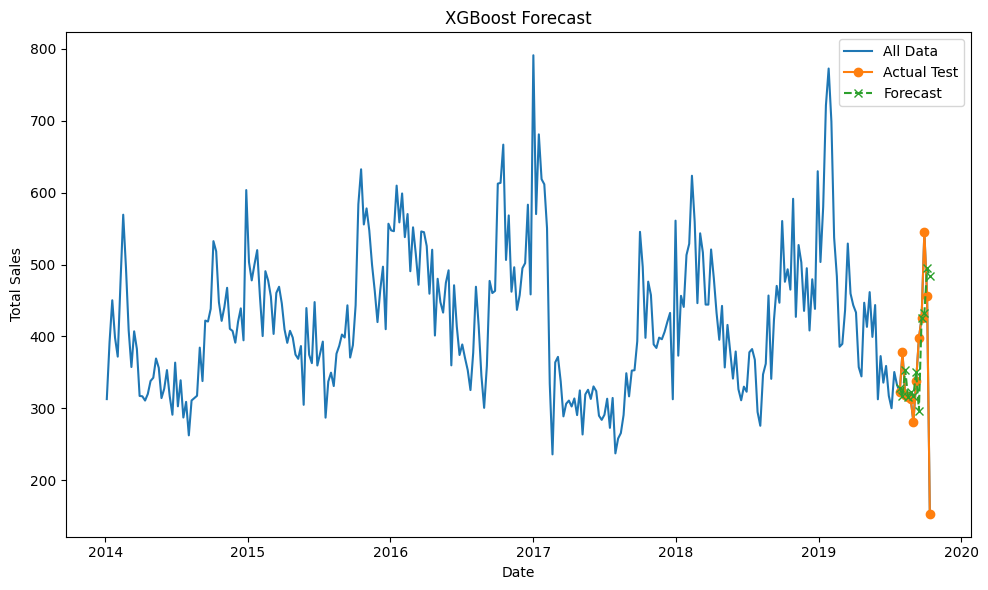

c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

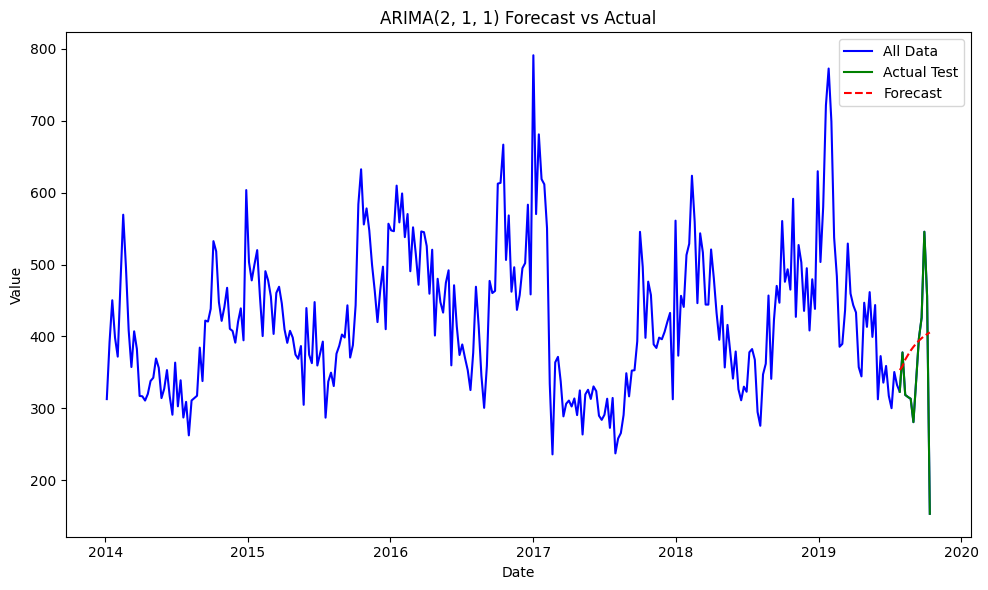

c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\predictions\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

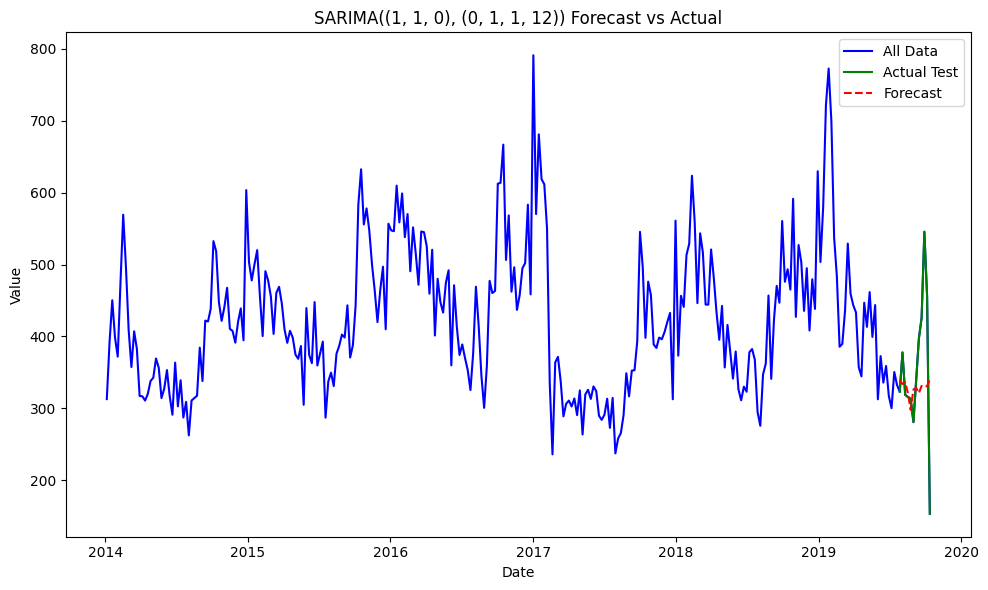

14:17:30 - cmdstanpy - INFO - Chain [1] start processing
14:17:30 - cmdstanpy - INFO - Chain [1] done processing


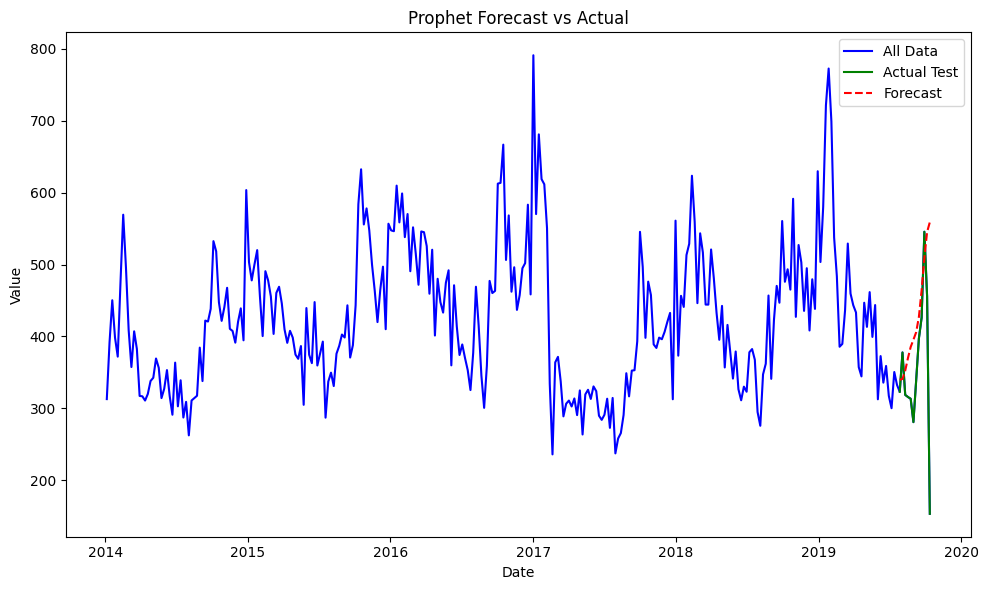

(17038.948600544303, 130.5333237167594, 82.85961176625993)

In [41]:
forecast_linear_regression(df['total_sales'])
forecast_random_forest(df['total_sales'])
forecast_xgboost(df['total_sales'])
forecast_arima(df['total_sales'])
forecast_sarima(df['total_sales'])
forecast_prophet(df[['datum', 'total_sales']])



## TABULAR REPRESENTATION OF MODEL EVALUATION

In [42]:
df_results = pd.DataFrame(evaluation_results)
print(df_results)

               Model           MSE        RMSE        MAE  \
0  Linear Regression   9955.406598   99.776784  67.238486   
1      Random Forest  10171.105533  100.851899  58.989577   
2            XGBoost  11672.328642  108.038552  61.935908   
3              ARIMA   9446.087799   97.190986  71.791466   
4            SARIMAX   9715.122094   98.565319  70.880548   
5          FBPROPHET  17038.948601  130.533324  82.859612   

                                       MPE  
0  (27.383050196608867, 72.61694980339114)  
1   (25.39247459726696, 74.60752540273305)  
2   (26.53434453441521, 73.46565546558479)  
3                                      NaN  
4                                      NaN  
5                                      NaN  


## Model Selection Justification

Based on the evaluation metrics and visual inspection, the Random Forest model is selected as the best-performing model. While it does not have the lowest RMSE or MSE, it achieved the lowest MAE, indicating more consistent and smaller prediction errors. Additionally, the forecast from Random Forest closely followed the actual trend and seasonality in the data, making it more reliable for capturing the underlying patterns of our weekly time series. Therefore, it strikes a good balance between accuracy and realistic trend representation.